In [25]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/Shruti491/DS1724/refs/heads/main/blogs.csv',encoding = 'latin-1')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [28]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [29]:
label_encoder = LabelEncoder()
df['Labels_encoded'] = label_encoder.fit_transform(df['Labels'])
df

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [32]:
df

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [33]:
df[df['Labels'] == 'alt.atheism']    #filtering

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
95,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
96,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
97,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0
98,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0


In [34]:
df[df['Labels']=='talk.religion.misc']

,Data,Labels,Labels_encoded
1900,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1901,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,19
1902,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1903,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1904,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [42]:
 alt_atheism = df[df['Labels'] == 'alt.atheism']

In [44]:
talk_religion_misc = df[df['Labels']=='talk.religion.misc']

In [45]:
alt_atheism

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
95,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
96,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
97,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....,alt.atheism,0
98,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0


In [46]:
talk_religion_misc

,Data,Labels,Labels_encoded
1900,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1901,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,talk.religion.misc,19
1902,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1903,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1904,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [47]:
#worldcloud function

In [48]:
alt_atheism['Data']

,Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
...,...
95,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
96,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
97,Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....
98,Newsgroups: alt.atheism\nPath: cantaloupe.srv....


In [49]:
talk_religion_misc['Data']

,Data
1900,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1901,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
1902,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1903,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1904,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....


In [50]:
' '.join(alt_atheism['Data']) #joining all rows into paragraph

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [51]:
def wordcl(data,heading):
    txt = ' '.join(data['Data'])
    wc = WordCloud(background_color='white',width=700, height=200,
                  colormap='viridis').generate(txt)
    plt.imshow(wc)
    plt.axis('off')
    plt.title(heading)

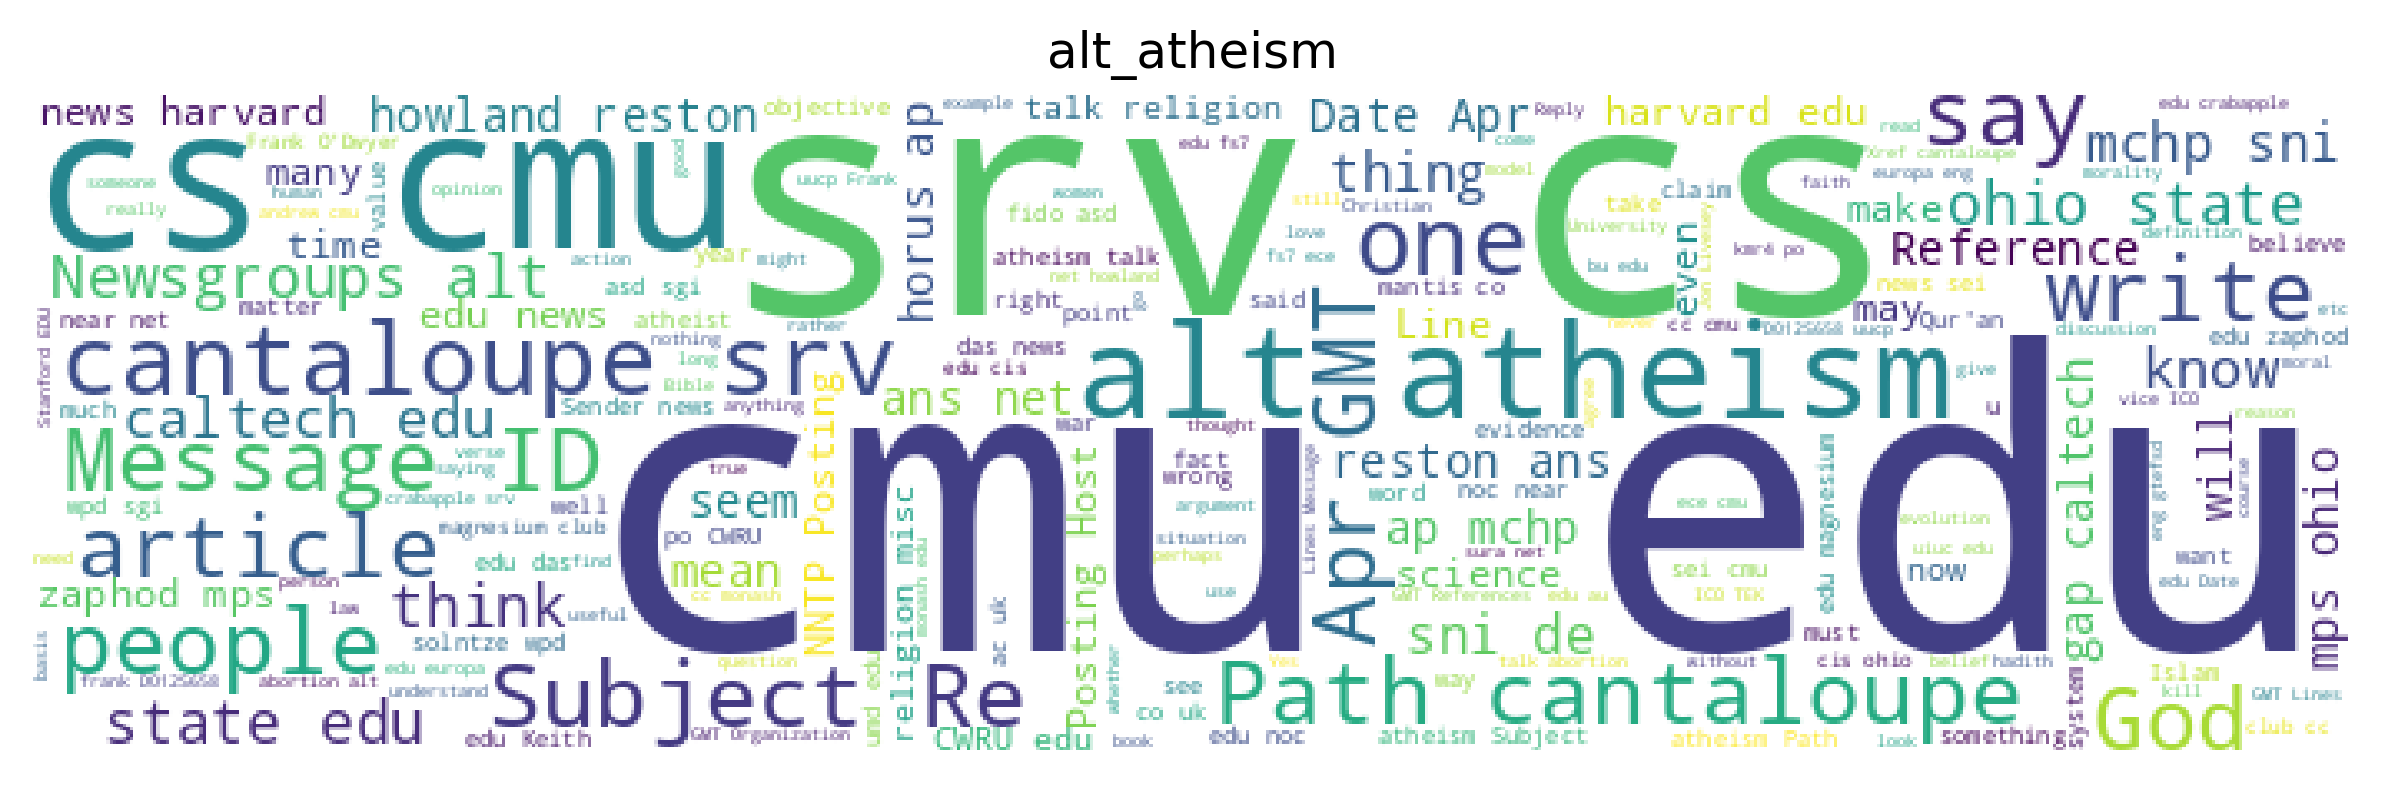

In [52]:
wordcl(alt_atheism,'alt_atheism')

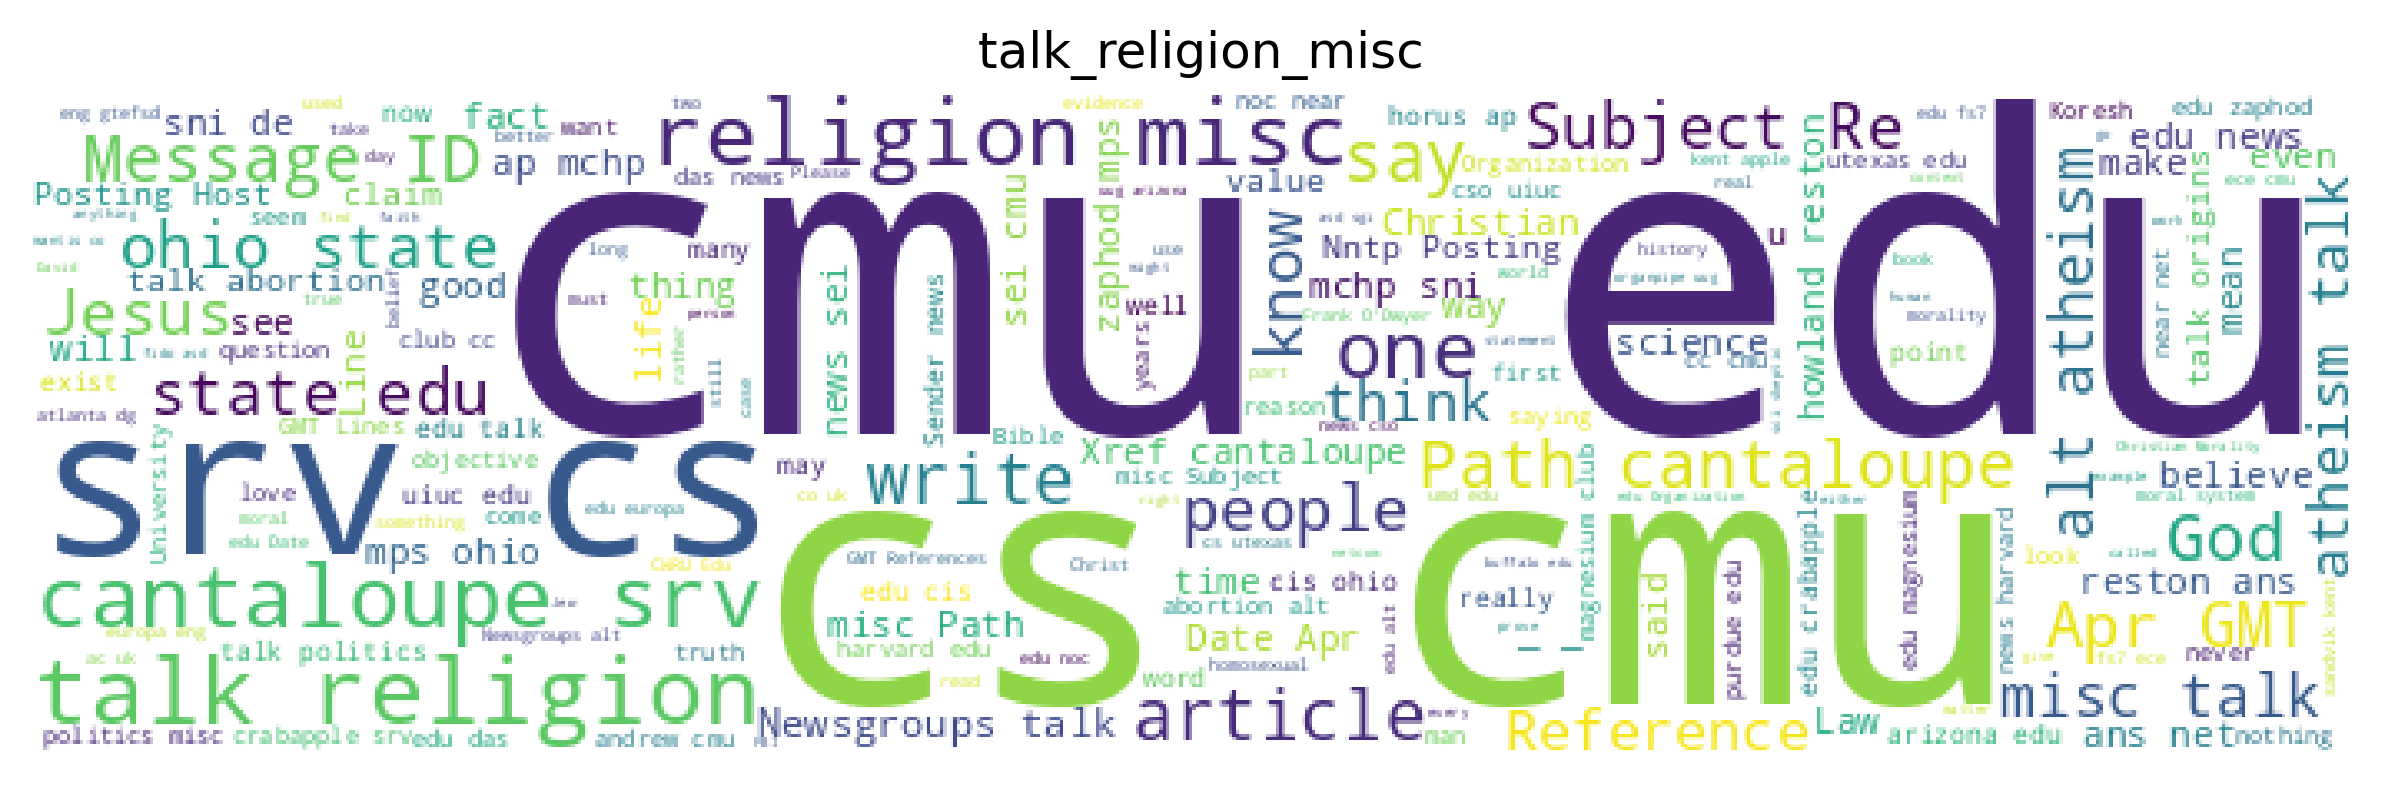

In [53]:
wordcl( talk_religion_misc,'talk_religion_misc')

In [55]:
#Text Cleaning

In [56]:
df

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [57]:
lemma = WordNetLemmatizer()

In [58]:
nltk.download('stopwords')         #this downloads are compulsory
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [59]:
range(len(df))

range(0, 2000)

In [60]:
df['Data'][0]

'Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank\nFrom: frank@D012S658.uucp (Frank O\'Dwyer)\nNewsgroups: alt.atheism\nSubject: Re: islamic genocide\nDate: 23 Apr 1993 23:51:47 GMT\nOrganization: Siemens-Nixdorf AG\nLines: 110\nDistribution: world\nMessage-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>\nReferences: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>\nNNTP-Posting-Host: d012s658.ap.mchp.sni.de\n\nIn article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O\'Dwyer) writes:\n#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:\n#|> #\n#|> #Noting that a particular society, in this case the mainland UK,

In [62]:
corpus = []

for i in range(len(df)):
    msg = re.sub('[^a-zA-Z]',' ',df['Data'][i]) #Clean the text
    msg = msg.lower() #Text normalization
    msg = msg.split() #Word tokenize
    msg = [lemma.lemmatize(i) for i in msg if i not in stopwords.words('english')] #Lemmatization
    msg = ' '.join(msg) # Join sentences
    corpus.append(msg)

In [63]:
corpus

['path cantaloupe srv c cmu edu magnesium club cc cmu edu news sei cmu edu ci ohio state edu zaphod mp ohio state edu howland reston an net agate doc ic ac uk uknet mcsun germany eu net thoth mchp sni de horus ap mchp sni de frank frank uucp frank dwyer newsgroups alt atheism subject islamic genocide date apr gmt organization siemens nixdorf ag line distribution world message id r vej k horus ap mchp sni de reference r qe fido asd sgi com r ubl bd horus ap mchp sni de r ek uo fido asd sgi com nntp posting host ap mchp sni de article r ek uo fido asd sgi com livesey solntze wpd sgi com jon livesey writes article r ubl bd horus ap mchp sni de frank uucp frank dwyer writes article r qe fido asd sgi com livesey solntze wpd sgi com jon livesey writes noting particular society case mainland uk religously motivated murder murder kind say little whether inter religion murder elsewhere religiously motivated allows one conclude nothing inherent religion matter catholicism protestantism motivates

In [64]:
#Model Building

In [65]:
#Feature Extraction

In [66]:
#Tf-IDF

In [67]:
df

,Data,Labels,Labels_encoded
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,0
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,0
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,0
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,19
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,19
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,19


In [68]:
y = df['Labels_encoded']
y

,Labels_encoded
0,0
1,0
2,0
3,0
4,0
...,...
1995,19
1996,19
1997,19
1998,19


In [69]:
tf = TfidfVectorizer()

x_data = tf.fit_transform(corpus)
x_data = x_data.toarray()
x_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
xtrain,xtest,ytrain,ytest = train_test_split(x_data,y,test_size=0.2, random_state=1)

In [71]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)

print(f"Train Accuracy: {nb.score(xtrain,ytrain)}\nTest Accuracy: {nb.score(xtest,ytest)}")

Train Accuracy: 0.985625
Test Accuracy: 0.82
